In [282]:
import pyspark
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pyspark.ml.stat import Correlation
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [429]:
sc.stop()

In [284]:
# Initializing a Spark session

conf = pyspark.SparkConf().setAppName('appName').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession(sc)

In [285]:
raw_data = spark.read.format("csv").option("header","true").option("inferSchema", "true").load(r"sulbha.ss.csv")
raw_data.columns

['AnonPuid',
 'Product_new_group_update',
 'tot_cnt',
 'PI_Others',
 'PI_Productivity_App',
 'PI_Entertainment_App',
 'PI_Casual_game',
 'PI_Core_game',
 'PI_Others_OperatingSystem',
 'PI_Others_Pass',
 'PI_MMTV',
 'PI_Other_App',
 'PI_Others_Device',
 'PI_Others_Bundle',
 'PI_Others_Music',
 'tot_Usage_Engagement',
 'Usage_Others',
 'Usage_Productivity_App',
 'Usage_Entertainment_App',
 'Usage_Casual_game',
 'Usage_Core_game',
 'Usage_Others_OperatingSystem',
 'Usage_Others_Pass',
 'Usage_MMTV',
 'Usage_Other_App',
 'Usage_Others_Device',
 'Usage_Others_Bundle',
 'Usage_Others_Music']

## Product_new_group_update = Target Group
## tot_cnt =  # of visits
## PI_... = Page impression, share of among all product cateory visit
## total_usage_engagement = time spent of site
## Usage_ ... = time spent on that product

In [286]:
raw_data.printSchema()

root
 |-- AnonPuid: integer (nullable = true)
 |-- Product_new_group_update: string (nullable = true)
 |-- tot_cnt: integer (nullable = true)
 |-- PI_Others: double (nullable = true)
 |-- PI_Productivity_App: double (nullable = true)
 |-- PI_Entertainment_App: double (nullable = true)
 |-- PI_Casual_game: double (nullable = true)
 |-- PI_Core_game: double (nullable = true)
 |-- PI_Others_OperatingSystem: double (nullable = true)
 |-- PI_Others_Pass: double (nullable = true)
 |-- PI_MMTV: double (nullable = true)
 |-- PI_Other_App: double (nullable = true)
 |-- PI_Others_Device: double (nullable = true)
 |-- PI_Others_Bundle: double (nullable = true)
 |-- PI_Others_Music: integer (nullable = true)
 |-- tot_Usage_Engagement: integer (nullable = true)
 |-- Usage_Others: integer (nullable = true)
 |-- Usage_Productivity_App: integer (nullable = true)
 |-- Usage_Entertainment_App: integer (nullable = true)
 |-- Usage_Casual_game: integer (nullable = true)
 |-- Usage_Core_game: integer (null

In [287]:
pd.DataFrame(raw_data.take(5), columns = raw_data.columns).transpose()

,0,1,2,3,4
AnonPuid,1,2,3,4,5
Product_new_group_update,Others,Others,Productivity_App,Entertainment_App,Others
tot_cnt,3,1,1,13,18
PI_Others,1,1,0,0.923077,0.5
PI_Productivity_App,0,0,1,0.384615,0.222222
PI_Entertainment_App,0,0,0,0.461538,0
PI_Casual_game,0,0,0,0.230769,0
PI_Core_game,0,0,0,0,0.277778
PI_Others_OperatingSystem,0,0,0,0,0
PI_Others_Pass,0,0,0,0,0


In [288]:
raw_data.groupBy("Product_new_group_update").count().toPandas()

,Product_new_group_update,count
0,Productivity_App,45
1,MMTV,2
2,Others_Pass,3
3,Casual_game,17
4,Core_game,14
5,Others_Operating System,3
6,Others,279
7,Entertainment_App,29


## lets consider - 'Others' , 'Productivity_App', 'Entertainment_App'

In [289]:
d = raw_data.select('*').where((raw_data.Product_new_group_update =='Productivity_App') | (raw_data.Product_new_group_update =='Others') | (raw_data.Product_new_group_update =='Entertainment_App')).collect()
#|| 'Product_new_group_update==Others' || 'Product_new_group_update==Entertainment_App' )

In [290]:
data1 = spark.createDataFrame(d,raw_data.columns )

In [291]:
data1.groupBy('Product_new_group_update').count().toPandas()

,Product_new_group_update,count
0,Productivity_App,45
1,Others,279
2,Entertainment_App,29


## Exploratory Data Analysis

In [292]:
data1.columns

['AnonPuid',
 'Product_new_group_update',
 'tot_cnt',
 'PI_Others',
 'PI_Productivity_App',
 'PI_Entertainment_App',
 'PI_Casual_game',
 'PI_Core_game',
 'PI_Others_OperatingSystem',
 'PI_Others_Pass',
 'PI_MMTV',
 'PI_Other_App',
 'PI_Others_Device',
 'PI_Others_Bundle',
 'PI_Others_Music',
 'tot_Usage_Engagement',
 'Usage_Others',
 'Usage_Productivity_App',
 'Usage_Entertainment_App',
 'Usage_Casual_game',
 'Usage_Core_game',
 'Usage_Others_OperatingSystem',
 'Usage_Others_Pass',
 'Usage_MMTV',
 'Usage_Other_App',
 'Usage_Others_Device',
 'Usage_Others_Bundle',
 'Usage_Others_Music']

### convert target label to binary/multinomial class

In [342]:
from pyspark.sql.functions import *

#for i in data2.Product_new_group_update
#data2['label_out'] = data2.apply(lambda x: 0 if x['Product_new_group_update']=='Others')
#.drop(df.Id)\

data2 = data1.withColumn("label_New", lit(-1))

data2 = data2\
.withColumn('label_New',when(data2['Product_new_group_update'] == 'Others',0).otherwise(data2.label_New))

data2 = data2\
.withColumn('label_New',when(data2['Product_new_group_update'] == 'Productivity_App',1).otherwise(data2.label_New))

data2 = data2\
.withColumn('label_New',when(data2['Product_new_group_update'] == 'Entertainment_App',2).otherwise(data2.label_New))

data2\
.select(col('label_New').alias('label'),col('*'))\
.toPandas().head(5)

,label,AnonPuid,Product_new_group_update,tot_cnt,PI_Others,PI_Productivity_App,PI_Entertainment_App,PI_Casual_game,PI_Core_game,PI_Others_OperatingSystem,...,Usage_Casual_game,Usage_Core_game,Usage_Others_OperatingSystem,Usage_Others_Pass,Usage_MMTV,Usage_Other_App,Usage_Others_Device,Usage_Others_Bundle,Usage_Others_Music,label_New
0,0,1,Others,3,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,Others,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,292642266,0,0,0,106185,0,0,0,0,0
2,1,3,Productivity_App,1,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
3,2,4,Entertainment_App,13,0.923077,0.384615,0.461538,0.230769,0.000000,0.0,...,9609,0,0,0,23422314,0,0,0,0,2
4,0,5,Others,18,0.500000,0.222222,0.000000,0.000000,0.277778,0.0,...,0,0,0,0,0,0,0,0,0,0


In [347]:
data2 = data2.select(['AnonPuid',
 'tot_cnt',
 'PI_Others',
 'PI_Productivity_App',
 'PI_Entertainment_App',
 'PI_Casual_game',
 'PI_Core_game',
 'PI_Others_OperatingSystem',
 'PI_Others_Pass',
 'PI_MMTV',
 'PI_Other_App',
 'PI_Others_Device',
 'PI_Others_Bundle',
 'PI_Others_Music',
 'tot_Usage_Engagement',
 'Usage_Others',
 'Usage_Productivity_App',
 'Usage_Entertainment_App',
 'Usage_Casual_game',
 'Usage_Core_game',
 'Usage_Others_OperatingSystem',
 'Usage_Others_Pass',
 'Usage_MMTV',
 'Usage_Other_App',
 'Usage_Others_Device',
 'Usage_Others_Bundle',
 'Usage_Others_Music',
 'label_New'])

In [348]:
data2.columns

['AnonPuid',
 'tot_cnt',
 'PI_Others',
 'PI_Productivity_App',
 'PI_Entertainment_App',
 'PI_Casual_game',
 'PI_Core_game',
 'PI_Others_OperatingSystem',
 'PI_Others_Pass',
 'PI_MMTV',
 'PI_Other_App',
 'PI_Others_Device',
 'PI_Others_Bundle',
 'PI_Others_Music',
 'tot_Usage_Engagement',
 'Usage_Others',
 'Usage_Productivity_App',
 'Usage_Entertainment_App',
 'Usage_Casual_game',
 'Usage_Core_game',
 'Usage_Others_OperatingSystem',
 'Usage_Others_Pass',
 'Usage_MMTV',
 'Usage_Other_App',
 'Usage_Others_Device',
 'Usage_Others_Bundle',
 'Usage_Others_Music',
 'label_New']

In [ ]:
## standrize usage 


In [349]:
cols = data2.columns

In [350]:
pi_cols = []
for i in range(len(cols)):
    if cols[i].startswith('PI'):
        pi_cols.append(cols[i])
pi_cols       

['PI_Others',
 'PI_Productivity_App',
 'PI_Entertainment_App',
 'PI_Casual_game',
 'PI_Core_game',
 'PI_Others_OperatingSystem',
 'PI_Others_Pass',
 'PI_MMTV',
 'PI_Other_App',
 'PI_Others_Device',
 'PI_Others_Bundle',
 'PI_Others_Music']

In [351]:
usage_cols = []
for i in range(len(cols)):
    if cols[i].startswith('Usage'):
        usage_cols.append(cols[i])
usage_cols  

['Usage_Others',
 'Usage_Productivity_App',
 'Usage_Entertainment_App',
 'Usage_Casual_game',
 'Usage_Core_game',
 'Usage_Others_OperatingSystem',
 'Usage_Others_Pass',
 'Usage_MMTV',
 'Usage_Other_App',
 'Usage_Others_Device',
 'Usage_Others_Bundle',
 'Usage_Others_Music']

In [352]:
corr_cols = usage_cols + pi_cols
corr_cols

['Usage_Others',
 'Usage_Productivity_App',
 'Usage_Entertainment_App',
 'Usage_Casual_game',
 'Usage_Core_game',
 'Usage_Others_OperatingSystem',
 'Usage_Others_Pass',
 'Usage_MMTV',
 'Usage_Other_App',
 'Usage_Others_Device',
 'Usage_Others_Bundle',
 'Usage_Others_Music',
 'PI_Others',
 'PI_Productivity_App',
 'PI_Entertainment_App',
 'PI_Casual_game',
 'PI_Core_game',
 'PI_Others_OperatingSystem',
 'PI_Others_Pass',
 'PI_MMTV',
 'PI_Other_App',
 'PI_Others_Device',
 'PI_Others_Bundle',
 'PI_Others_Music']

## Find data summary

In [353]:
data_corr =  data1.select(corr_cols)
data_corr.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Usage_Others,353,0.0,0.0,0,0
Usage_Productivity_App,353,2887640.793201133,8328090.365942975,0,73786670
Usage_Entertainment_App,353,1.578475554674221E7,9.374913999593619E7,0,1495979798
Usage_Casual_game,353,7399592.388101983,3.458885994179648E7,0,379321524
Usage_Core_game,353,1891054.5722379603,1.1972544992895395E7,0,169869164
Usage_Others_OperatingSystem,353,0.0,0.0,0,0
Usage_Others_Pass,353,1644082.9461756374,1.4977467826347379E7,0,259938031
Usage_MMTV,353,671027.3994334277,4864652.744976976,0,53631513
Usage_Other_App,353,0.0,0.0,0,0


In [298]:
#numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']

## Data Cleaning

In [354]:
# Usage_Others, Usage_Others_OperatingSystem, Usage_Other_App, Usage_Others_Device, Usage_Others_Bundle, Usage_Others_Music, PI_Others_Music
# are 0 values so can be dropped

data_corr = data_corr.drop('Usage_Others')
data_corr = data_corr.drop('Usage_Others_OperatingSystem')
data_corr = data_corr.drop('Usage_Other_App')
data_corr = data_corr.drop('Usage_Others_Device')
data_corr = data_corr.drop('Usage_Others_Bundle')
data_corr = data_corr.drop('Usage_Others_Music')
data_corr = data_corr.drop('PI_Others_Music')

In [355]:
data_corr.columns

['Usage_Productivity_App',
 'Usage_Entertainment_App',
 'Usage_Casual_game',
 'Usage_Core_game',
 'Usage_Others_Pass',
 'Usage_MMTV',
 'PI_Others',
 'PI_Productivity_App',
 'PI_Entertainment_App',
 'PI_Casual_game',
 'PI_Core_game',
 'PI_Others_OperatingSystem',
 'PI_Others_Pass',
 'PI_MMTV',
 'PI_Other_App',
 'PI_Others_Device',
 'PI_Others_Bundle']

## Outlier Detection

In [356]:
## check outliers based on IQR distance

bounds = {
    c: dict(
        zip(["q1", "q3"], data_corr.approxQuantile(c, [0.25, 0.75], 0))
    )
    for c in data_corr.columns
}

for c in bounds:
    iqr = bounds[c]['q3'] - bounds[c]['q1']
    bounds[c]['lower'] = bounds[c]['q1'] - (iqr * 1.5)
    bounds[c]['upper'] = bounds[c]['q3'] + (iqr * 1.5)
print(bounds)

{'Usage_Productivity_App': {'q1': 26859.0, 'q3': 1723815.0, 'lower': -2518575.0, 'upper': 4269249.0}, 'Usage_Entertainment_App': {'q1': 9423.0, 'q3': 3497328.0, 'lower': -5222434.5, 'upper': 8729185.5}, 'Usage_Casual_game': {'q1': 0.0, 'q3': 0.0, 'lower': 0.0, 'upper': 0.0}, 'Usage_Core_game': {'q1': 0.0, 'q3': 0.0, 'lower': 0.0, 'upper': 0.0}, 'Usage_Others_Pass': {'q1': 0.0, 'q3': 0.0, 'lower': 0.0, 'upper': 0.0}, 'Usage_MMTV': {'q1': 0.0, 'q3': 0.0, 'lower': 0.0, 'upper': 0.0}, 'PI_Others': {'q1': 0.666666667, 'q3': 1.0, 'lower': 0.16666666749999998, 'upper': 1.4999999995}, 'PI_Productivity_App': {'q1': 0.0, 'q3': 0.25, 'lower': -0.375, 'upper': 0.625}, 'PI_Entertainment_App': {'q1': 0.0, 'q3': 0.258064516, 'lower': -0.38709677400000003, 'upper': 0.6451612900000001}, 'PI_Casual_game': {'q1': 0.0, 'q3': 0.166666667, 'lower': -0.2500000005, 'upper': 0.4166666675}, 'PI_Core_game': {'q1': 0.0, 'q3': 0.0, 'lower': 0.0, 'upper': 0.0}, 'PI_Others_OperatingSystem': {'q1': 0.0, 'q3': 0.0, 'l

In [361]:
# select all features within 1 IQR + 3IQR

import pyspark.sql.functions as f

data_outlier = data2.select(
    "*",
    *[
        f.when(
            f.col(c).between(bounds[c]['lower'], bounds[c]['upper']),
            0
        ).otherwise(1).alias(c+"_out") 
        for c in data_corr.columns
    ]
)

In [362]:
data_outlier.columns

['AnonPuid',
 'tot_cnt',
 'PI_Others',
 'PI_Productivity_App',
 'PI_Entertainment_App',
 'PI_Casual_game',
 'PI_Core_game',
 'PI_Others_OperatingSystem',
 'PI_Others_Pass',
 'PI_MMTV',
 'PI_Other_App',
 'PI_Others_Device',
 'PI_Others_Bundle',
 'PI_Others_Music',
 'tot_Usage_Engagement',
 'Usage_Others',
 'Usage_Productivity_App',
 'Usage_Entertainment_App',
 'Usage_Casual_game',
 'Usage_Core_game',
 'Usage_Others_OperatingSystem',
 'Usage_Others_Pass',
 'Usage_MMTV',
 'Usage_Other_App',
 'Usage_Others_Device',
 'Usage_Others_Bundle',
 'Usage_Others_Music',
 'label_New',
 'Usage_Productivity_App_out',
 'Usage_Entertainment_App_out',
 'Usage_Casual_game_out',
 'Usage_Core_game_out',
 'Usage_Others_Pass_out',
 'Usage_MMTV_out',
 'PI_Others_out',
 'PI_Productivity_App_out',
 'PI_Entertainment_App_out',
 'PI_Casual_game_out',
 'PI_Core_game_out',
 'PI_Others_OperatingSystem_out',
 'PI_Others_Pass_out',
 'PI_MMTV_out',
 'PI_Other_App_out',
 'PI_Others_Device_out',
 'PI_Others_Bundle_out']

In [363]:
out_lst = []
for i in data_outlier.columns:
    if i.endswith('_out'):
        out_lst.append(i)
        print (i + ' has ' + str(data_outlier.filter( data_outlier[i]==1).count()))


Usage_Productivity_App_out has 52
Usage_Entertainment_App_out has 54
Usage_Casual_game_out has 86
Usage_Core_game_out has 31
Usage_Others_Pass_out has 38
Usage_MMTV_out has 86
PI_Others_out has 31
PI_Productivity_App_out has 24
PI_Entertainment_App_out has 24
PI_Casual_game_out has 34
PI_Core_game_out has 82
PI_Others_OperatingSystem_out has 6
PI_Others_Pass_out has 20
PI_MMTV_out has 16
PI_Other_App_out has 14
PI_Others_Device_out has 8
PI_Others_Bundle_out has 3


In [364]:
data_outlier.count()

353

In [365]:
data_outlier.filter(data_outlier.Usage_Productivity_App_out==0).count()

301

In [366]:
expr = ' and '.join('(%s == 0)' % col_name for col_name in out_lst)
expr
#df.filter(expr).show()

'(Usage_Productivity_App_out == 0) and (Usage_Entertainment_App_out == 0) and (Usage_Casual_game_out == 0) and (Usage_Core_game_out == 0) and (Usage_Others_Pass_out == 0) and (Usage_MMTV_out == 0) and (PI_Others_out == 0) and (PI_Productivity_App_out == 0) and (PI_Entertainment_App_out == 0) and (PI_Casual_game_out == 0) and (PI_Core_game_out == 0) and (PI_Others_OperatingSystem_out == 0) and (PI_Others_Pass_out == 0) and (PI_MMTV_out == 0) and (PI_Other_App_out == 0) and (PI_Others_Device_out == 0) and (PI_Others_Bundle_out == 0)'

In [367]:
data_outlier.filter(expr).count()

82

In [277]:
82/301

0.2724252491694352

In [325]:
#final_cols = data_outlier.columns + ['AnonPuid','tot_cnt','tot_Usage_Engagement','Product_new_group_update']
#final_cols 

In [368]:
data_outlier = data_outlier.filter(expr)

In [304]:
#data_outlier = data_outlier.filter(expr)

In [306]:
#data_outlier.filter((col('Usage_Productivity_App_out')==0) & (col('Usage_Entertainment_App_out')==0)).count()

In [370]:
# keep original feature set i.e. no need of outlier columns
data_outlier = data_outlier.select(data2.columns)
print (data_outlier.columns)
print (data_outlier.count())

['AnonPuid', 'tot_cnt', 'PI_Others', 'PI_Productivity_App', 'PI_Entertainment_App', 'PI_Casual_game', 'PI_Core_game', 'PI_Others_OperatingSystem', 'PI_Others_Pass', 'PI_MMTV', 'PI_Other_App', 'PI_Others_Device', 'PI_Others_Bundle', 'PI_Others_Music', 'tot_Usage_Engagement', 'Usage_Others', 'Usage_Productivity_App', 'Usage_Entertainment_App', 'Usage_Casual_game', 'Usage_Core_game', 'Usage_Others_OperatingSystem', 'Usage_Others_Pass', 'Usage_MMTV', 'Usage_Other_App', 'Usage_Others_Device', 'Usage_Others_Bundle', 'Usage_Others_Music', 'label_New']
82


## Feature Selection - correlation and p-value

In [371]:
feat_cols = ['tot_cnt', 'PI_Others', 'PI_Productivity_App', 'PI_Entertainment_App', 'PI_Casual_game', 'PI_Core_game', \
             'PI_Others_OperatingSystem', 'PI_Others_Pass', 'PI_MMTV', 'PI_Other_App', 'PI_Others_Device', 'PI_Others_Bundle', \
             'PI_Others_Music', 'tot_Usage_Engagement', 'Usage_Others', 'Usage_Productivity_App', 'Usage_Entertainment_App', \
             'Usage_Casual_game', 'Usage_Core_game', 'Usage_Others_OperatingSystem', 'Usage_Others_Pass', 'Usage_MMTV', \
             'Usage_Other_App', 'Usage_Others_Device', 'Usage_Others_Bundle', 'Usage_Others_Music']

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; 

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; aut

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; aut

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; aut

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; aut

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; aut

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; aut

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; aut

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; aut

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; aut

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; aut

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; aut

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; aut

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; aut

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; aut

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; aut

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; aut

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; aut

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; aut

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; aut

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; aut

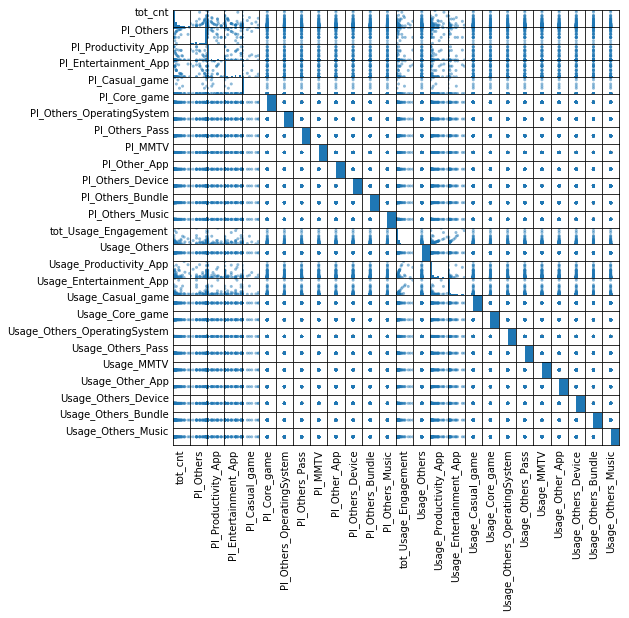

In [372]:
numeric_data = data_outlier.select(feat_cols).toPandas()

axs = pd.scatter_matrix(numeric_data, figsize=(8, 8));

# Rotate axis labels and remove axis ticks
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())
plt.show()

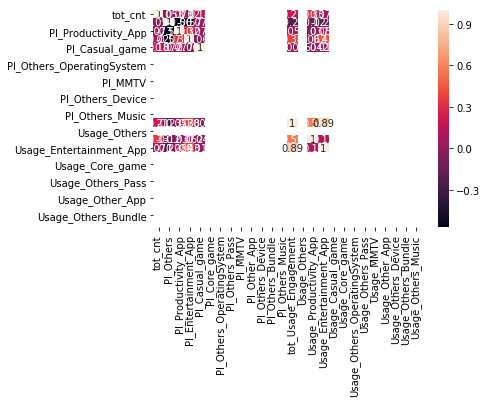

In [373]:
import seaborn as sns

sns.heatmap(numeric_data.corr(), annot=True)

In [374]:
from pyspark.ml.stat import Correlation

r1 = Correlation.corr(data_outlier.select(feat_cols), feat_cols).head()
print("Pearson correlation matrix:\n" + str(r1[0]))

r2 = Correlation.corr(data_outlier.select(feat_cols), feat_cols, "spearman").head()
print("Spearman correlation matrix:\n" + str(r2[0]))

Py4JError: An error occurred while calling z:org.apache.spark.ml.stat.Correlation.corr. Trace:
py4j.Py4JException: Method corr([class org.apache.spark.sql.Dataset, class java.util.ArrayList, class java.lang.String]) does not exist
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:318)
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:339)
	at py4j.Gateway.invoke(Gateway.java:276)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)



In [339]:
# select features where correlation < 0.9
corr = numeric_data.corr() 

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = numeric_data.columns[columns]
data = numeric_data[selected_columns]
data.head()

,tot_cnt,PI_Others,PI_Productivity_App,PI_Entertainment_App,PI_Casual_game,PI_Core_game,PI_Others_OperatingSystem,PI_Others_Pass,PI_MMTV,PI_Other_App,...,Usage_Entertainment_App,Usage_Casual_game,Usage_Core_game,Usage_Others_OperatingSystem,Usage_Others_Pass,Usage_MMTV,Usage_Other_App,Usage_Others_Device,Usage_Others_Bundle,Usage_Others_Music
0,3,1.000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,3375,0,0,0,0,0,0,0,0,0
1,3,1.000,0.000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,...,7923547,0,0,0,0,0,0,0,0,0
2,8,0.875,0.125,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,1.000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,132264,0,0,0,0,0,0,0,0,0
4,16,1.000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [386]:
list(selected_columns)

['tot_cnt',
 'PI_Others',
 'PI_Productivity_App',
 'PI_Entertainment_App',
 'PI_Casual_game',
 'PI_Core_game',
 'PI_Others_OperatingSystem',
 'PI_Others_Pass',
 'PI_MMTV',
 'PI_Other_App',
 'PI_Others_Device',
 'PI_Others_Bundle',
 'PI_Others_Music',
 'tot_Usage_Engagement',
 'Usage_Others',
 'Usage_Productivity_App',
 'Usage_Entertainment_App',
 'Usage_Casual_game',
 'Usage_Core_game',
 'Usage_Others_OperatingSystem',
 'Usage_Others_Pass',
 'Usage_MMTV',
 'Usage_Other_App',
 'Usage_Others_Device',
 'Usage_Others_Bundle',
 'Usage_Others_Music']

In [387]:
cc = list(selected_columns) + ['label_New']
cc

['tot_cnt',
 'PI_Others',
 'PI_Productivity_App',
 'PI_Entertainment_App',
 'PI_Casual_game',
 'PI_Core_game',
 'PI_Others_OperatingSystem',
 'PI_Others_Pass',
 'PI_MMTV',
 'PI_Other_App',
 'PI_Others_Device',
 'PI_Others_Bundle',
 'PI_Others_Music',
 'tot_Usage_Engagement',
 'Usage_Others',
 'Usage_Productivity_App',
 'Usage_Entertainment_App',
 'Usage_Casual_game',
 'Usage_Core_game',
 'Usage_Others_OperatingSystem',
 'Usage_Others_Pass',
 'Usage_MMTV',
 'Usage_Other_App',
 'Usage_Others_Device',
 'Usage_Others_Bundle',
 'Usage_Others_Music',
 'label_New']

In [388]:
data_final = data_outlier.select(cc).toPandas()
data_final.head()

,tot_cnt,PI_Others,PI_Productivity_App,PI_Entertainment_App,PI_Casual_game,PI_Core_game,PI_Others_OperatingSystem,PI_Others_Pass,PI_MMTV,PI_Other_App,...,Usage_Casual_game,Usage_Core_game,Usage_Others_OperatingSystem,Usage_Others_Pass,Usage_MMTV,Usage_Other_App,Usage_Others_Device,Usage_Others_Bundle,Usage_Others_Music,label_New
0,3,1.000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,3,1.000,0.000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,8,0.875,0.125,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,1.000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,16,1.000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


ValueError: num must be 1 <= num <= 24, not 25

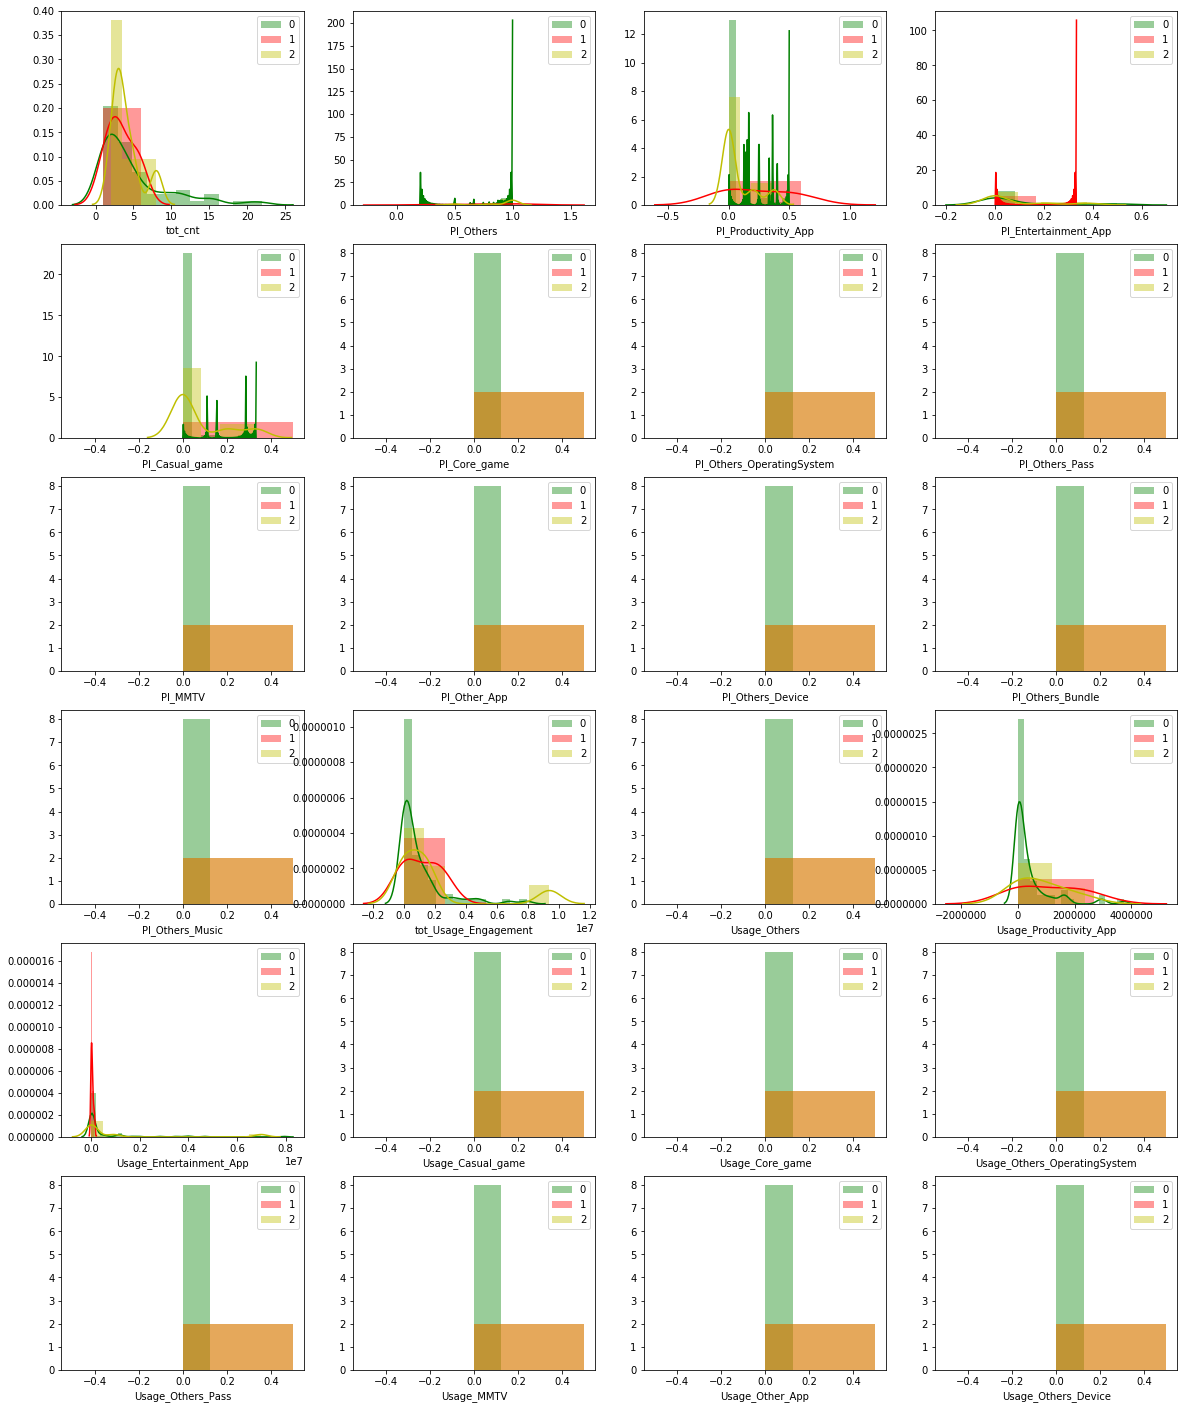

In [390]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data_final.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data_final[i][data_final['label_New']==0], color='g', label = '0')
    sns.distplot(data_final[i][data_final['label_New']==1], color='r', label = '1')
    sns.distplot(data_final[i][data_final['label_New']==2], color='y', label = '2')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [ ]:
## select values based on p-value, null-hypothesis says this combination of features does not affects the independent variable.
## if p-value < threshold then it affects the prediction and hence kept in feature set (i.e. reject the nul-hypothesis)
## 

In [375]:
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Py4JError: An error occurred while calling z:org.apache.spark.sql.functions.max. Trace:
py4j.Py4JException: Method max([class java.util.ArrayList]) does not exist
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:318)
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:339)
	at py4j.Gateway.invoke(Gateway.java:276)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)



In [377]:
from pyspark.ml.stat import ChiSquareTest

r = ChiSquareTest.test(df, "features", "label").head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))

Py4JJavaError: An error occurred while calling z:org.apache.spark.ml.stat.ChiSquareTest.test.
: java.lang.IllegalStateException: SparkContext has been shutdown
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2053)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.rdd.RDD$$anonfun$take$1.apply(RDD.scala:1364)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.take(RDD.scala:1337)
	at org.apache.spark.rdd.RDD$$anonfun$first$1.apply(RDD.scala:1378)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.first(RDD.scala:1377)
	at org.apache.spark.mllib.stat.test.ChiSqTest$.chiSquaredFeatures(ChiSqTest.scala:86)
	at org.apache.spark.mllib.stat.Statistics$.chiSqTest(Statistics.scala:176)
	at org.apache.spark.ml.stat.ChiSquareTest$.test(ChiSquareTest.scala:75)
	at org.apache.spark.ml.stat.ChiSquareTest.test(ChiSquareTest.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


In [378]:
# final_cols = data_corr.columns + ['tot_cnt','tot_Usage_Engagement','Product_new_group_update']
# final_cols 

In [104]:
## data1 is the final data set
#data2 = data1.select(final_cols)
#data2.toPandas().head(5)

,Usage_Productivity_App,Usage_Entertainment_App,Usage_Casual_game,Usage_Core_game,Usage_Others_Pass,Usage_MMTV,PI_Others,PI_Productivity_App,PI_Entertainment_App,PI_Casual_game,PI_Core_game,PI_Others_OperatingSystem,PI_Others_Pass,PI_MMTV,PI_Other_App,PI_Others_Device,PI_Others_Bundle,tot_cnt,tot_Usage_Engagement,Product_new_group_update
0,0,3375,0,0,0,0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3,3375,Others
1,7268661,9984,292642266,0,0,106185,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,300027096,Others
2,370781,1187516,0,0,0,0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,1558297,Productivity_App
3,11070747,12021833,9609,0,0,23422314,0.923077,0.384615,0.461538,0.230769,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,13,46524503,Entertainment_App
4,587733,1859,0,0,0,0,0.500000,0.222222,0.000000,0.000000,0.277778,0.0,0.0,0.0,0.0,0.0,0.0,18,589592,Others


In [394]:
data_final.columns 

Index(['tot_cnt', 'PI_Others', 'PI_Productivity_App', 'PI_Entertainment_App',
       'PI_Casual_game', 'PI_Core_game', 'PI_Others_OperatingSystem',
       'PI_Others_Pass', 'PI_MMTV', 'PI_Other_App', 'PI_Others_Device',
       'PI_Others_Bundle', 'PI_Others_Music', 'tot_Usage_Engagement',
       'Usage_Others', 'Usage_Productivity_App', 'Usage_Entertainment_App',
       'Usage_Casual_game', 'Usage_Core_game', 'Usage_Others_OperatingSystem',
       'Usage_Others_Pass', 'Usage_MMTV', 'Usage_Other_App',
       'Usage_Others_Device', 'Usage_Others_Bundle', 'Usage_Others_Music',
       'label_New'],
      dtype='object')

### undersampling oversampling

In [430]:
sm = SMOTE(random_state=12, ratio = 'auto', kind = 'regular')

NameError: name 'SMOTE' is not defined

In [395]:
cols =data_final.columns

In [396]:
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler

#categoricalColumns = ['Product_new_group_update']
stages = []

#for categoricalCol in categoricalColumns:
#    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
#    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
#    stages += [stringIndexer, encoder]

label_stringIdx = StringIndexer(inputCol = 'label_New', outputCol = 'label')
stages += [label_stringIdx]

numericCols = ['Usage_Productivity_App',
 'Usage_Entertainment_App',
 'Usage_Casual_game',
 'Usage_Core_game',
 'Usage_Others_Pass',
 'Usage_MMTV',
 'PI_Others',
 'PI_Productivity_App',
 'PI_Entertainment_App',
 'PI_Casual_game',
 'PI_Core_game',
 'PI_Others_OperatingSystem',
 'PI_Others_Pass',
 'PI_MMTV',
 'PI_Other_App',
 'PI_Others_Device',
 'PI_Others_Bundle',
 'tot_cnt',
 'tot_Usage_Engagement']

#assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assemblerInputs =  numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [397]:
stages

[StringIndexer_faa8b8f0a0ad, VectorAssembler_342f87c80feb]

In [399]:
data2 =spark.createDataFrame(data_final ) 

In [408]:
cols = data2.columns + ['label', 'features']
cols

['tot_cnt',
 'PI_Others',
 'PI_Productivity_App',
 'PI_Entertainment_App',
 'PI_Casual_game',
 'PI_Core_game',
 'PI_Others_OperatingSystem',
 'PI_Others_Pass',
 'PI_MMTV',
 'PI_Other_App',
 'PI_Others_Device',
 'PI_Others_Bundle',
 'PI_Others_Music',
 'tot_Usage_Engagement',
 'Usage_Others',
 'Usage_Productivity_App',
 'Usage_Entertainment_App',
 'Usage_Casual_game',
 'Usage_Core_game',
 'Usage_Others_OperatingSystem',
 'Usage_Others_Pass',
 'Usage_MMTV',
 'Usage_Other_App',
 'Usage_Others_Device',
 'Usage_Others_Bundle',
 'Usage_Others_Music',
 'label_New',
 'label',
 'features']

In [409]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(data2)
df1 = pipelineModel.transform(data2)
#selectedCols = ['label', 'features'] + [cols]
selectedCols = cols

print (selectedCols)

df1 = df1.select(selectedCols)
df1.printSchema()

['tot_cnt', 'PI_Others', 'PI_Productivity_App', 'PI_Entertainment_App', 'PI_Casual_game', 'PI_Core_game', 'PI_Others_OperatingSystem', 'PI_Others_Pass', 'PI_MMTV', 'PI_Other_App', 'PI_Others_Device', 'PI_Others_Bundle', 'PI_Others_Music', 'tot_Usage_Engagement', 'Usage_Others', 'Usage_Productivity_App', 'Usage_Entertainment_App', 'Usage_Casual_game', 'Usage_Core_game', 'Usage_Others_OperatingSystem', 'Usage_Others_Pass', 'Usage_MMTV', 'Usage_Other_App', 'Usage_Others_Device', 'Usage_Others_Bundle', 'Usage_Others_Music', 'label_New', 'label', 'features']
root
 |-- tot_cnt: long (nullable = true)
 |-- PI_Others: double (nullable = true)
 |-- PI_Productivity_App: double (nullable = true)
 |-- PI_Entertainment_App: double (nullable = true)
 |-- PI_Casual_game: double (nullable = true)
 |-- PI_Core_game: double (nullable = true)
 |-- PI_Others_OperatingSystem: double (nullable = true)
 |-- PI_Others_Pass: double (nullable = true)
 |-- PI_MMTV: double (nullable = true)
 |-- PI_Other_App: dou

In [411]:
pd.DataFrame(df1.take(5), columns=df1.columns).transpose()

,0,1,2,3,4
tot_cnt,3,3,8,4,16
PI_Others,1,1,0.875,1,1
PI_Productivity_App,0,0,0.125,0,0
PI_Entertainment_App,0,0.333333,0,0,0
PI_Casual_game,0,0,0,0,0
PI_Core_game,0,0,0,0,0
PI_Others_OperatingSystem,0,0,0,0,0
PI_Others_Pass,0,0,0,0,0
PI_MMTV,0,0,0,0,0
PI_Other_App,0,0,0,0,0


# train test split

In [412]:
train, test = df1.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 59
Test Dataset Count: 23


In [413]:
from pyspark.ml.classification import LogisticRegression

#lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10, family='multinomial')
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10, elasticNetParam=0.8)

lrModel = lr.fit(train)

In [414]:
print("Multinomial coefficients: " + str(lrModel.coefficientMatrix))
print("Multinomial intercepts: " + str(lrModel.interceptVector))

Multinomial coefficients: 3 X 19 CSRMatrix
(0,0) -0.0
(0,1) 0.0
(0,6) 0.1782
(0,7) -2.5063
(0,8) 3.0929
(0,9) -3.9667
(0,17) 0.1892
(0,18) 0.0
(1,0) 0.0
(1,1) -0.0
(1,6) 0.5569
(1,7) -2.7645
(1,8) -1.6785
(1,9) 9.0286
(1,17) -0.1217
(1,18) -0.0
..
..
Multinomial intercepts: [1.5063294175245154,-0.6632724507879355,-0.8430569667365798]


In [415]:
pred = lrModel.transform(test)

In [416]:
df_pred = pred.toPandas()
df_pred.head()

,tot_cnt,PI_Others,PI_Productivity_App,PI_Entertainment_App,PI_Casual_game,PI_Core_game,PI_Others_OperatingSystem,PI_Others_Pass,PI_MMTV,PI_Other_App,...,Usage_Other_App,Usage_Others_Device,Usage_Others_Bundle,Usage_Others_Music,label_New,label,features,rawPrediction,probability,prediction
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.0,"(45029.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0...","[1.832319269931606, -0.22361836196099077, -1.6...","[0.8620654145038017, 0.11032091447960304, 0.02...",0.0
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.0,"(0.0, 99172.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0...","[1.9311986939227295, -0.2575385333595577, -1.6...","[0.8777708900459501, 0.0983613937390812, 0.023...",0.0
2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.0,"(474450.0, 10437.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0...","[1.4432085556534542, -0.18483606551783244, -1....","[0.7915071866607135, 0.1553832021638628, 0.053...",0.0
3,2,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,2.0,"(8750.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0....","[0.7127000304879816, -2.009533663862891, 1.296...","[0.3497525533739639, 0.022988456985096422, 0.6...",2.0
4,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.0,"(0.0, 16923.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0...","[2.0727820353012616, -0.35471284546841486, -1....","[0.9002244933765416, 0.07945169989484689, 0.02...",0.0


In [417]:
df_pred['label'].value_counts()

0.0    19
1.0     2
2.0     2
Name: label, dtype: int64

In [418]:
df_pred['prediction'].value_counts()

0.0    22
2.0     1
Name: prediction, dtype: int64

In [419]:
from sklearn.metrics import *

In [420]:
accuracy_score(df_pred['label'],df_pred['prediction'])

0.8695652173913043

In [423]:
print (classification_report(df_pred['label'],df_pred['prediction']))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93        19
         1.0       0.00      0.00      0.00         2
         2.0       1.00      0.50      0.67         2

   micro avg       0.87      0.87      0.87        23
   macro avg       0.62      0.50      0.53        23
weighted avg       0.80      0.87      0.82        23



C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [424]:
l = (df_pred[1:3]['probability'])*100
l[1]

DenseVector([87.7771, 9.8361, 2.3868])

In [426]:
trainingSummary = lrModel.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)


# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
trainingSummary.roc.show()
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

# Set the model threshold to maximize F-Measure
fMeasure = trainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
bestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']
lr.setThreshold(bestThreshold)

objectiveHistory:
0.5341203065350415
0.5240790062031783
0.5083070274996531
0.46006495239725803
0.43073971728271365
0.388552317161223
0.37392513486754186
0.3646133446473273
0.3550587106626585
0.3513692867371562
0.3505064904620605


AttributeError: 'LogisticRegressionTrainingSummary' object has no attribute 'roc'

In [427]:
lrModel.coefficientMatrix[0:0]

TypeError: cannot unpack non-iterable slice object

In [428]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients[0])
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

Py4JJavaError: An error occurred while calling o7187.coefficients.
: org.apache.spark.SparkException: Multinomial models contain a matrix of coefficients, use coefficientMatrix instead.
	at org.apache.spark.ml.classification.LogisticRegressionModel.coefficients(LogisticRegression.scala:955)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
